In [23]:
import pandas as pd
data = pd.read_csv("wine-data.csv")
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


In [24]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [25]:
data.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
type                     object
dtype: object

In [26]:
data["type"].value_counts()

white    4898
red      1599
Name: type, dtype: int64

In [27]:
# Turn the wine categories into booleans. 1 = red
#Define a function, apply it using pandas dataframe.apply/
def toBool(s):
    if s == "white":
        return 0
    return 1

data["type"] = data["type"].apply(toBool)
data["type"].value_counts()

0    4898
1    1599
Name: type, dtype: int64

In [41]:
# Perform a PCA with 5 features. 
from sklearn.decomposition import PCA
pca = PCA(n_components=5)
pca.fit(data.iloc[:,:11])
transformed = pca.transform(data.iloc[:,:11])
pd.DataFrame(data=transformed).head()

,0,1,2,3,4
0,-84.111149,-0.145117,0.025666,0.399654,-1.581266
1,-48.779427,5.847319,-0.862358,0.775057,-0.780022
2,-63.734575,-0.876416,-0.423401,0.649272,-0.880127
3,-57.481266,-0.345098,-1.008598,3.645054,0.892979
4,-84.111149,-0.145117,0.025666,0.399654,-1.581266


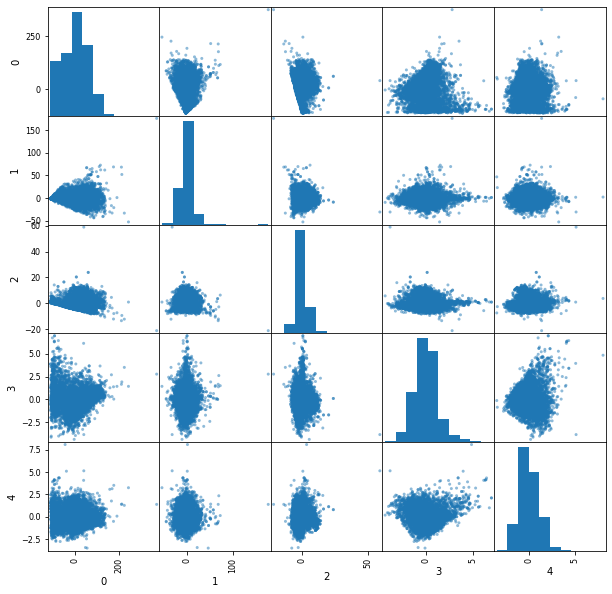

In [53]:
#Why not plot it? Like a rorsach test
_ = pd.plotting.scatter_matrix(pd.DataFrame(transformed))
plt.gcf().set_size_inches(10,10)

In [158]:
#Define a function so we don't repeat code
# performs a train/test split and returns fpr and tpr
def ttsPredict(model, x, y):
    # Train/test split, fit the model,
    # predict probabilities using x testing data,
    # then use roc_curve to return fprs and tprs.
    # so we can plot them later.
    xtrain, xtest, ytrain, ytest = train_test_split(x,y)
    model.fit(xtrain, ytrain)
    yscores = model.predict_proba(xtest)[:,1]
    fpr, tpr, thresholds = metrics.roc_curve(ytest, yscores)
    return fpr, tpr

In [159]:
#Perform logistic regression with 5 components. Save the accuracy, tpr, fpr for later.
from sklearn.linear_model import LogisticRegression as lr
from sklearn.model_selection import cross_val_score

#Just keeping the x and y data consistent.
#x being training data, y being the booleans we are trying to predict.
x = transformed
y = data["type"]

#max_iter=1000 because Jupyter seems to explode without it
model = lr(max_iter=1000)

#Perform single train test split and save tpr and fpr for later
tpr5pca, fpr5pca = ttsPredict(model,x,y)

pca5acc = cross_val_score(model,x,y,scoring="accuracy") 

#find the explained variance ratio
pca.explained_variance_ratio_

array([0.95375825, 0.04062775])

In [161]:
#now get the top 2 principal components
pca = PCA(n_components=2)
pca.fit(data.iloc[:,:11])

#Transform the data into2 features
transformed = pca.transform(data.iloc[:,:11])

#Getr the accuracy from cross validation, save for later
pca2acc = cross_val_score(model,x,y,scoring="accuracy") 

#Save tpr and fpr for later
tpr2pca, fpr2pca = ttsPredict(model,transformed,y)

#And show it for good measure
pd.DataFrame(data=transformed).head()


,0,1
0,-84.111149,-0.145117
1,-48.779427,5.847319
2,-63.734575,-0.876416
3,-57.481266,-0.345098
4,-84.111149,-0.145117


Text(0.5, 1.0, 'Accuracies From Logistic Regression After PCA')

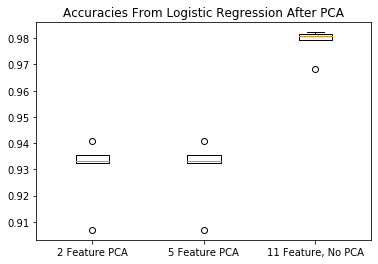

In [162]:
from sklearn.linear_model import LogisticRegression as lr
from sklearn.model_selection import cross_val_score

#Getting accuracy of 11 feature logistic regression, no pca
nopcacc = cross_val_score(model, data.iloc[:,1:11], y, scoring="accuracy")

#Get tpr and fpr for a single train/test split on the data 
# without PCA
tprnopca, fprnopca = ttsPredict(model, data.iloc[:,1:11], y)

# Finally let's show some accuracies
_ = plt.boxplot([pca2acc, pca5acc,nopcacc])
plt.xticks([1,2,3], labels=["2 Feature PCA", "5 Feature PCA", "11 Feature, No PCA"])
plt.title("Accuracies From Logistic Regression After PCA")

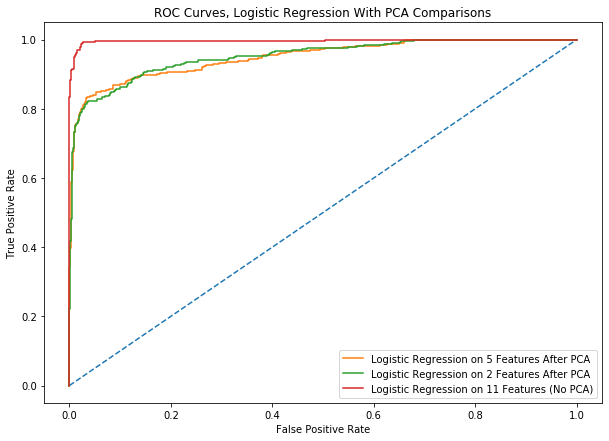

In [169]:
#Make ROC curves to compare the three methods of fitting explored in this exercise.

# Plot a LINE
plt.plot([0, 1], [0, 1], linestyle="--")

plt.plot(tpr5pca, fpr5pca, label="Logistic Regression on 5 Features After PCA")
plt.plot(tpr2pca ,fpr2pca, label="Logistic Regression on 2 Features After PCA")
plt.plot(tprnopca ,fprnopca, label="Logistic Regression on 11 Features (No PCA)")

# Prettying up the graph
plt.gcf().set_size_inches(10,7)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves, Logistic Regression With PCA Comparisons")
plt.legend()

Accuracy scores from cross validation show that logistic regression before PCA gives more accurate predictions than logistic regression after PCA. We see the same result from inspecting the ROC curves, with linear regression on no PCA yielding a higher AUC than the other tests.